<a href="https://colab.research.google.com/github/tamdoancong/5215-MachineLearning-Doan/blob/master/TamDoanW7LogisticRegressionEdit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [542]:
#import libraries
import random
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression,Perceptron
from sklearn.metrics import mean_squared_error, r2_score
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
pd.options.display.max_rows=12
plt.rcParams.update({'font.size': 18})

In [543]:
#download the data
!git clone https://github.com/sopolat/HomeworkFiles.git

fatal: destination path 'HomeworkFiles' already exists and is not an empty directory.


In [544]:
#load training dataframes
sl_c = pd.read_csv("/content/HomeworkFiles/iris/train/iris_versicolor_vs_virginica.sl.c.train.csv")
sl_pl = pd.read_csv("/content/HomeworkFiles/iris/train/iris_versicolor_vs_virginica.sl.pl.train.csv")
sl_pw_c = pd.read_csv("/content/HomeworkFiles/iris/train/iris_versicolor_vs_virginica.sl_pw.c.train.csv")
sl_pw_pl = pd.read_csv("/content/HomeworkFiles/iris/train/iris_versicolor_vs_virginica.sl_pw.pl.train.csv")
#load dev set
sl_c_d = pd.read_csv("/content/HomeworkFiles/iris/tune/iris_versicolor_vs_virginica.sl.c.tune.csv")
sl_pl_d = pd.read_csv("/content/HomeworkFiles/iris/tune/iris_versicolor_vs_virginica.sl.pl.tune.csv")
sl_pw_c_d = pd.read_csv("/content/HomeworkFiles/iris/tune/iris_versicolor_vs_virginica.sl_pw.c.tune.csv")
sl_pw_pl_d = pd.read_csv("/content/HomeworkFiles/iris/tune/iris_versicolor_vs_virginica.sl_pw.pl.tune.csv")

In [545]:
#update class labels
sl_c.loc[sl_c["iris class"]=="Iris-virginica","iris class"]=1
sl_c.loc[sl_c["iris class"]=="Iris-versicolor","iris class"]=0
sl_c["iris class"]=sl_c["iris class"].astype('int')

sl_pw_c.loc[sl_pw_c["iris class"]=="Iris-virginica","iris class"]=1
sl_pw_c.loc[sl_pw_c["iris class"]=="Iris-versicolor","iris class"]=0
sl_pw_c["iris class"]=sl_pw_c["iris class"].astype('int')


sl_c_d.loc[sl_c_d["iris class"]=="Iris-virginica","iris class"]=1
sl_c_d.loc[sl_c_d["iris class"]=="Iris-versicolor","iris class"]=0
sl_c_d["iris class"]=sl_c_d["iris class"].astype('int')

sl_pw_c_d.loc[sl_pw_c_d["iris class"]=="Iris-virginica","iris class"]=1
sl_pw_c_d.loc[sl_pw_c_d["iris class"]=="Iris-versicolor","iris class"]=0
sl_pw_c_d["iris class"]=sl_pw_c_d["iris class"].astype('int')

In [546]:
sl_pw_c_d


,sepal length,petal width,iris class
0,6.7,1.7,0
1,6.1,1.4,1
2,5.5,1.0,0
3,5.8,1.2,0
4,6.4,1.3,0
...,...,...,...
45,6.1,1.2,0
46,5.5,1.3,0
47,6.4,2.1,1
48,6.2,1.5,0


In [547]:
#ad x0 to data array for more convinent in caculate update weight
X=sl_pw_c_d.drop('iris class',axis=1)
X['x0']=1
X=X[['x0','sepal length','petal width']]
X


,x0,sepal length,petal width
0,1,6.7,1.7
1,1,6.1,1.4
2,1,5.5,1.0
3,1,5.8,1.2
4,1,6.4,1.3
...,...,...,...
45,1,6.1,1.2
46,1,5.5,1.3
47,1,6.4,2.1
48,1,6.2,1.5


In [548]:
X.columns

Index(['x0', 'sepal length', 'petal width'], dtype='object')

In [549]:
#initial weight 
w=[]
for i in range( 0, len(X.columns)):
  w.append(random.random())

w


[0.9997963704711919, 0.16164170383428744, 0.2818516220604116]

In [550]:
# find decision boundary we need solve : y1=1/(1+e^(-g(x)))=1/2 -> (1+e^(-g(x)))=2 ->g(x)=0
#->W0x0+w1x1+w2x2=0 -> x2=-(w0+w1x1)/w2
def Fx2(x1):
  
  x2 = -(w[0] + w[1] * x1) / w[2]
  return  x2

In [551]:
x1=sl_pw_c_d['sepal length'].to_numpy()

In [552]:
Fx2(x1)

array([-7.38968884, -7.04558927, -6.7014897 , -6.87353948, -7.21763905,
       -6.81618955, -7.27498898, -6.81618955, -6.7014897 , -7.96318813,
       -7.27498898, -7.16028913, -6.98823934, -6.52943991, -6.7014897 ,
       -7.38968884, -6.7014897 , -7.27498898, -7.73378841, -6.35739013,
       -7.21763905, -7.04558927, -7.5043887 , -6.75883963, -6.75883963,
       -7.1029392 , -7.44703877, -6.75883963, -6.81618955, -6.98823934,
       -6.41474006, -7.16028913, -7.21763905, -7.16028913, -7.67643848,
       -6.35739013, -7.38968884, -7.16028913, -7.79113834, -6.81618955,
       -7.5043887 , -7.38968884, -6.93088941, -6.93088941, -7.04558927,
       -7.04558927, -6.7014897 , -7.21763905, -7.1029392 , -7.38968884])

In [553]:
class1 = sl_pw_c_d[sl_pw_c_d['iris class'] == 1 ]
class0 = sl_pw_c_d[sl_pw_c_d['iris class'] == 0 ]

In [554]:
def draw():
  fig, (g) = plt.subplots(1, figsize=(16, 8))
  plt.scatter(class1['sepal length'], class1['petal width'], marker= "+", c= "green",s=188 )
  plt.scatter(class0['sepal length'], class0['petal width'], marker= ".", c= "blue",s=188 )

  g.set_xlim(4.5,8.5)
  g.set_ylim(.5,3)
  g.grid(True)
  x1 = np.linspace(-4.5, 8.5, 10000)
  plt.scatter(x1, Fx2(x1),color='red', marker="_");
  plt.xlabel("x1 is sepal length")
  plt.ylabel("x2 is petal width")
  plt.title(" iris class as g(sepal length, petal width")
  plt.show()

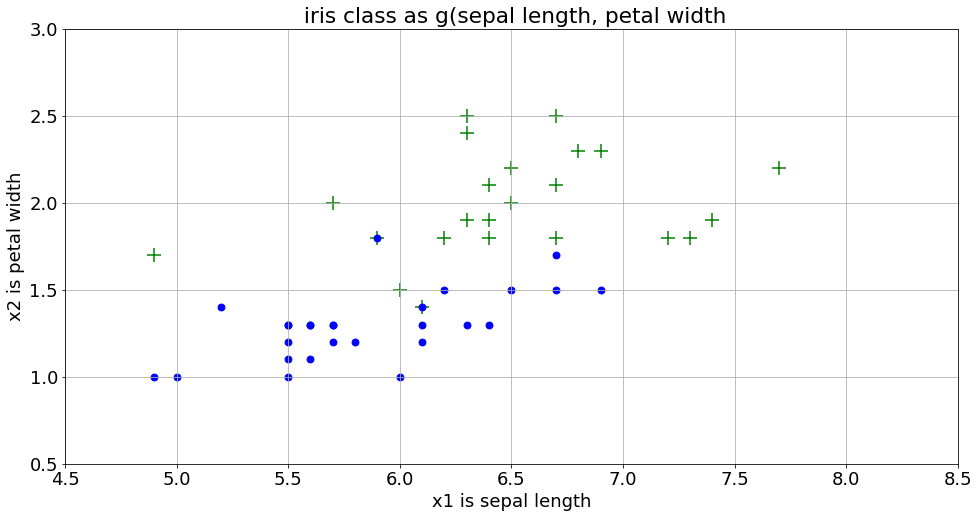

In [555]:
draw()

In [556]:
model=LogisticRegression()


In [557]:
model.fit(sl_pw_c.drop(['iris class'],axis=1),sl_pw_c['iris class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [558]:
p=model.predict_proba(sl_pw_c_d.drop('iris class',axis=1))
# probability of class 1 predict by model sklearn
p[:,1]

array([0.6068585 , 0.27654967, 0.0658971 , 0.14105357, 0.2691448 ,
       0.16825156, 0.41940582, 0.61313587, 0.14563657, 0.94049831,
       0.75863368, 0.89570276, 0.32013653, 0.15034242, 0.11271281,
       0.46156585, 0.08647867, 0.84984294, 0.77586448, 0.2485376 ,
       0.615727  , 0.22171074, 0.50428291, 0.09348364, 0.15661195,
       0.57451045, 0.90756101, 0.15661195, 0.13099917, 0.09765459,
       0.04396404, 0.92015442, 0.68255396, 0.25264553, 0.76063075,
       0.04050391, 0.67441219, 0.66372697, 0.83498764, 0.16825156,
       0.91449508, 0.94195791, 0.51087805, 0.51087805, 0.27654967,
       0.17511401, 0.14563657, 0.79473391, 0.35847899, 0.83347511])

In [559]:
## probability of class 0 predict by model
p[:,0]

array([0.3931415 , 0.72345033, 0.9341029 , 0.85894643, 0.7308552 ,
       0.83174844, 0.58059418, 0.38686413, 0.85436343, 0.05950169,
       0.24136632, 0.10429724, 0.67986347, 0.84965758, 0.88728719,
       0.53843415, 0.91352133, 0.15015706, 0.22413552, 0.7514624 ,
       0.384273  , 0.77828926, 0.49571709, 0.90651636, 0.84338805,
       0.42548955, 0.09243899, 0.84338805, 0.86900083, 0.90234541,
       0.95603596, 0.07984558, 0.31744604, 0.74735447, 0.23936925,
       0.95949609, 0.32558781, 0.33627303, 0.16501236, 0.83174844,
       0.08550492, 0.05804209, 0.48912195, 0.48912195, 0.72345033,
       0.82488599, 0.85436343, 0.20526609, 0.64152101, 0.16652489])

In [560]:
def Logistic_update_w(X,w,y,learning_rate,num,a):
  # caculate g(x)
  gx=np.dot(X,w)
  # probability of class 1
  py1=1/(1+ np.exp(-gx))
  # error 
  error=y-py1
  #initialize a array in purpose to store old error array, then subtract old error with new error
  temperror=[0]
  # for loop to control how many time update w
  for i in range(num):
    #caculate mean of different between old error and new error of all examples
    if np.absolute(((error-temperror).sum())/len(error))>a:
      #old error
      temperror=error
      #update weight 
      w+=np.dot(learning_rate*error,X)
      # update g(x) base on new weight
      gx=np.dot(X,w)
      # probability of class 1 base on new g(x)
      py1=1/(1+ np.exp(-gx))
      #new error
      error=y-py1
  return w

      
  

In [561]:
y1= sl_pw_c_d['iris class'].to_numpy()
X1=X.to_numpy()

In [572]:
w=Logistic_update_w(X1,w,y1,.2,100,.00001)
w


array([-93.49457568, -47.99473224, 246.94243175])

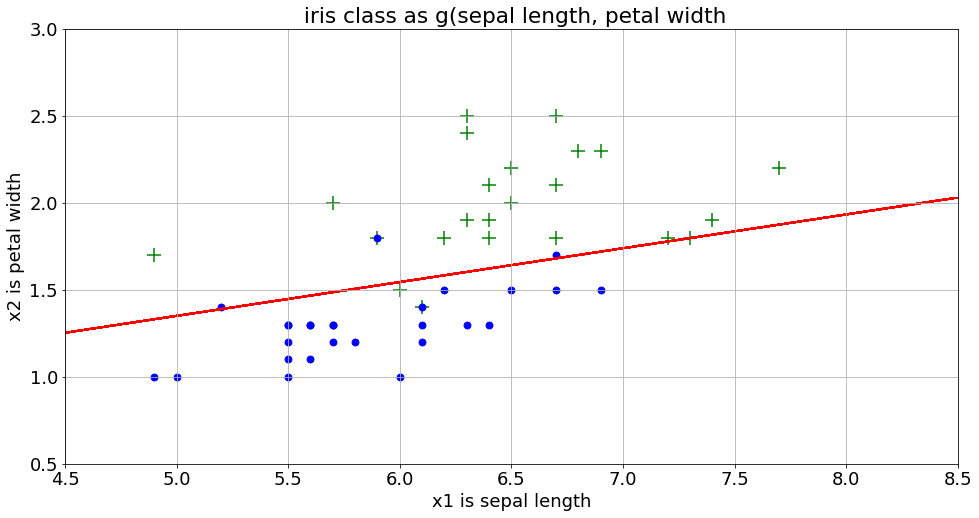

In [573]:
draw()